In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
x=np.array([6.5,6.8,7.0,8.0,8.5,9.8,10.5,5.5,5.0])
x_bar=np.mean(x)
x_bar

7.51111111111111

In [3]:
y=np.array([180,195,210,235,280,350,400,170,160])
y_bar=np.mean(y)
y_bar

242.22222222222223

Text(0,0.5,'Glucose')

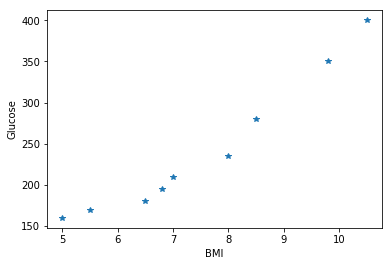

In [4]:
plt.plot(x,y,"*")
plt.xlabel("BMI")
plt.ylabel("Glucose")

In [5]:
new=(x-x_bar)*(y-y_bar)
cv=np.sum(new)/(len(x)-1)
cv

152.09722222222223

In [6]:
cr=cv/(np.std(x)*np.std(y))
cr
#here correlation is greater than 1,not possible
#this is due to we here are using built in formula, use n instead of (n-1)
#so we need to do it manually

1.0917677716463412

In [7]:
x_sd=np.sqrt(np.sum((x-x_bar)**2)/(len(x)-1))
y_sd=np.sqrt(np.sum((y-y_bar)**2)/(len(y)-1))

In [8]:
cr_new=cv/(x_sd*y_sd)
cr_new
#this is a very strong correlation

0.9704602414634144

In [9]:
np.corrcoef(x,y)
#this gives R
#0.97046024**2 this is R_sq

array([[1.        , 0.97046024],
       [0.97046024, 1.        ]])

In [10]:
#slope
beta1=cv/x_sd**2
beta1

44.20003228931224

In [11]:
#intercept
beta0=y_bar-beta1*x_bar
beta0

-89.76913141750077

In [12]:
#Model Equation (univariate Linear Regression Model)
y_predict=beta0+beta1*x
y_predict

array([197.53107846, 210.79108815, 219.63109461, 263.8311269 ,
       285.93114304, 343.39118502, 374.33120762, 153.33104617,
       131.23103003])

In [13]:
y

array([180, 195, 210, 235, 280, 350, 400, 170, 160])

In [14]:
#Effectiveness of the model (performance metric)
sse=np.sum((y-y_predict)**2)
sse

3323.9384888601876

In [15]:
mse=sse/len(x)
mse

369.3264987622431

In [16]:
rmse=np.sqrt(mse)
rmse

19.217869256560235

In [17]:
#Regression Error (SSR)
ssr=np.sum((y_predict-y_bar)**2)
ssr

53781.61706669537

In [18]:
#Sum Square Total (SST)
sst=np.sum((y-y_bar)**2)
sst

57105.55555555556

In [19]:
r_sq=ssr/sst
r_sq

0.9417930802612283

In [20]:
A=pd.read_csv("car_data.csv", index_col=0)
A.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [21]:
A.shape

(32, 11)

In [22]:
A.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 11 columns):
mpg     32 non-null float64
cyl     32 non-null int64
disp    32 non-null float64
hp      32 non-null int64
drat    32 non-null float64
wt      32 non-null float64
qsec    32 non-null float64
vs      32 non-null int64
am      32 non-null int64
gear    32 non-null int64
carb    32 non-null int64
dtypes: float64(5), int64(6)
memory usage: 3.0+ KB


In [23]:
A["am"].value_counts()

0    19
1    13
Name: am, dtype: int64

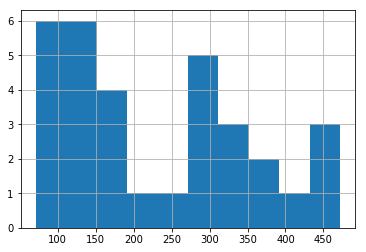

In [24]:
A["disp"].hist()

In [25]:
A.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')

In [26]:
B=A[['mpg','disp','hp','drat','wt','qsec']]
B.head()

,mpg,disp,hp,drat,wt,qsec
Mazda RX4,21.0,160.0,110,3.90,2.620,16.46
Mazda RX4 Wag,21.0,160.0,110,3.90,2.875,17.02
Datsun 710,22.8,108.0,93,3.85,2.320,18.61
Hornet 4 Drive,21.4,258.0,110,3.08,3.215,19.44
Hornet Sportabout,18.7,360.0,175,3.15,3.440,17.02


In [27]:
df=pd.DataFrame([A["mpg"],A["disp"],A["hp"],A["drat"],A["wt"],A["qsec"]])
df.T.head()

,mpg,disp,hp,drat,wt,qsec
Mazda RX4,21.0,160.0,110.0,3.90,2.620,16.46
Mazda RX4 Wag,21.0,160.0,110.0,3.90,2.875,17.02
Datsun 710,22.8,108.0,93.0,3.85,2.320,18.61
Hornet 4 Drive,21.4,258.0,110.0,3.08,3.215,19.44
Hornet Sportabout,18.7,360.0,175.0,3.15,3.440,17.02


In [28]:
B.corr()

,mpg,disp,hp,drat,wt,qsec
mpg,1.000000,-0.847551,-0.776168,0.681172,-0.867659,0.418684
disp,-0.847551,1.000000,0.790949,-0.710214,0.887980,-0.433698
hp,-0.776168,0.790949,1.000000,-0.448759,0.658748,-0.708223
drat,0.681172,-0.710214,-0.448759,1.000000,-0.712441,0.091205
wt,-0.867659,0.887980,0.658748,-0.712441,1.000000,-0.174716
qsec,0.418684,-0.433698,-0.708223,0.091205,-0.174716,1.000000


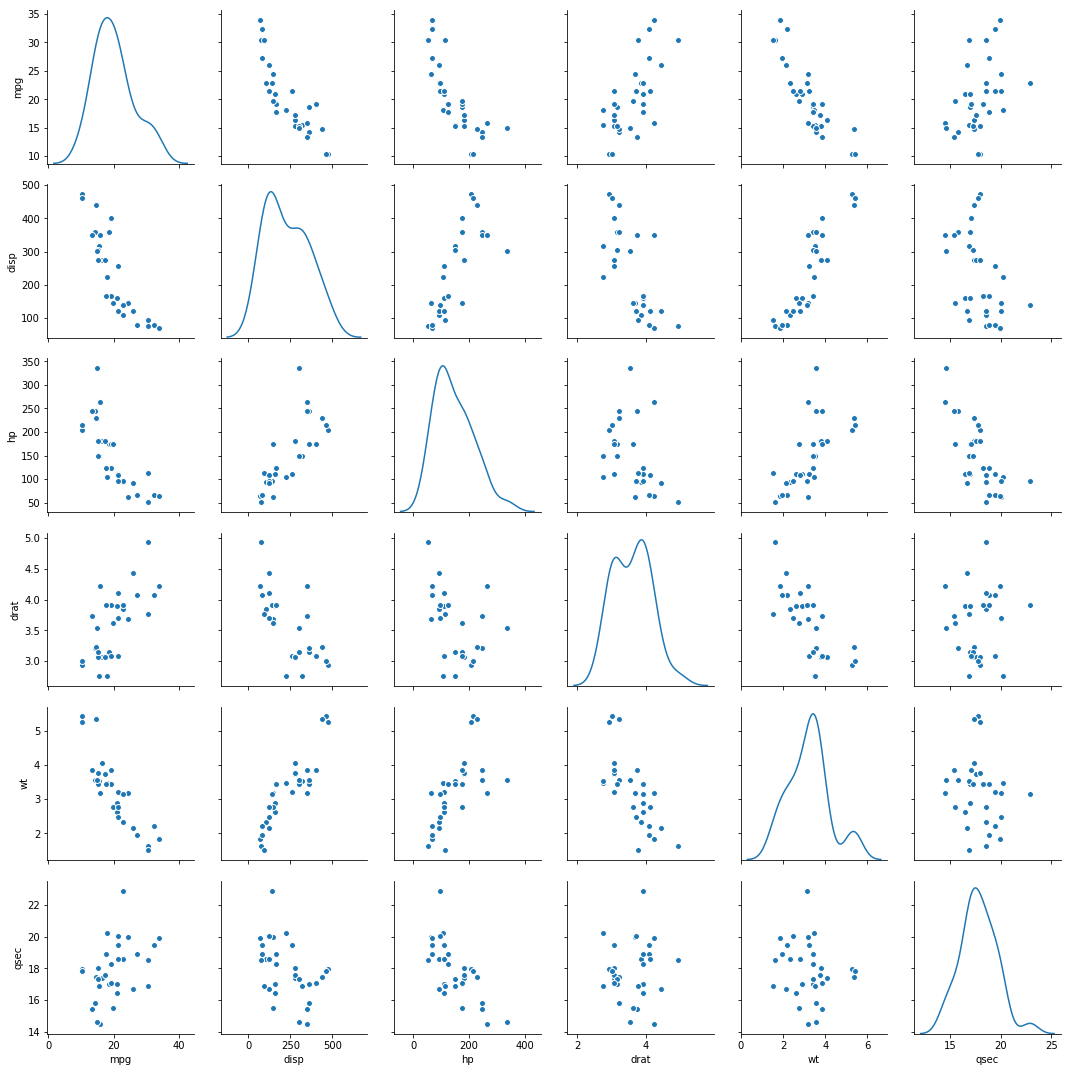

In [29]:
sns.pairplot(B, diag_kind="kde")
# two visuals can be easily inferred
# first is whether positive or negative
# second is intensity/ magnitude of the coefficient
# y-axis in a histogram is the frequency

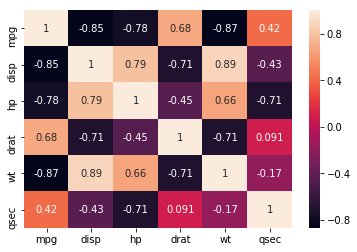

In [30]:
sns.heatmap(B.corr(), annot=True)

In [31]:
B.describe().T
#for mpg, difference between q1, min and q3,max is greater for the latter, so right skewed
#also, mean is greater than the median

,count,mean,std,min,25%,50%,75%,max
mpg,32.0,20.090625,6.026948,10.400,15.42500,19.200,22.80,33.900
disp,32.0,230.721875,123.938694,71.100,120.82500,196.300,326.00,472.000
hp,32.0,146.687500,68.562868,52.000,96.50000,123.000,180.00,335.000
drat,32.0,3.596563,0.534679,2.760,3.08000,3.695,3.92,4.930
wt,32.0,3.217250,0.978457,1.513,2.58125,3.325,3.61,5.424
qsec,32.0,17.848750,1.786943,14.500,16.89250,17.710,18.90,22.900


In [32]:
# we treat oultliers by replacing them with the median as median is less sensitive
# to check if data is normal, shapiro test


In [33]:
#x= B.drop(columns=['mpg'])
#y=B['mpg']

In [34]:
x1=B['disp']
x2=B['hp']
x3=B['wt']
y=B['mpg']

In [35]:
beta11=np.cov(x1,y)/np.var(x1)
beta01=np.mean(y)-beta11*np.mean(x1)
beta12=np.cov(x2,y)/np.var(x2)
beta02=np.mean(y)-beta12*np.mean(x2)
beta13=np.cov(x3,y)/np.var(x3)
beta03=np.mean(y)-beta13*np.mean(x3)

In [36]:
y1=beta01[0,1]+beta11[0,1]*x1
y2=beta02[0,1]+beta12[0,1]*x2
y3=beta03[0,1]+beta13[0,1]*x3


In [37]:
pd.DataFrame([y,y1,y2,y3]).T.head()

,mpg,disp,hp,wt
Mazda RX4,21.0,23.099462,22.674496,23.385578
Mazda RX4 Wag,21.0,23.099462,22.674496,21.978775
Datsun 710,22.8,25.311783,23.871792,25.040640
Hornet 4 Drive,21.4,18.930087,22.674496,20.103038
Hornet Sportabout,18.7,14.590534,18.096599,18.861741


In [38]:
r_sq1=np.sum((y1-np.mean(y))**2)/np.sum((y-np.mean(y))**2)
r_sq2=np.sum((y2-np.mean(y))**2)/np.sum((y-np.mean(y))**2)
r_sq3=np.sum((y3-np.mean(y))**2)/np.sum((y-np.mean(y))**2)

In [39]:
r_sq1,r_sq2,r_sq3

(0.7654355678059136, 0.6419311525682709, 0.8021860361145297)

In [40]:
#model-1
betaa11=np.sum((x1-np.mean(x1))*(y-np.mean(y)))/np.sum((x1-np.mean(x1))**2)
betaa01=np.mean(y)-betaa11*np.mean(x1)
yy1=betaa01+betaa11*x1
#model-2
betaa12=np.sum((x2-np.mean(x2))*(y-np.mean(y)))/np.sum((x2-np.mean(x2))**2)
betaa02=np.mean(y)-betaa12*np.mean(x2)
yy2=betaa02+betaa12*x2
#model-3
betaa13=np.sum((x3-np.mean(x3))*(y-np.mean(y)))/np.sum((x3-np.mean(x3))**2)
betaa03=np.mean(y)-betaa13*np.mean(x3)
yy3=betaa03+betaa13*x3


In [41]:
pd.DataFrame([y,yy1,yy2,yy3]).T.head()

,mpg,disp,hp,wt
Mazda RX4,21.0,23.005436,22.593750,23.282611
Mazda RX4 Wag,21.0,23.005436,22.593750,21.919770
Datsun 710,22.8,25.148622,23.753631,24.885952
Hornet 4 Drive,21.4,18.966354,22.593750,20.102650
Hornet Sportabout,18.7,14.762412,18.158912,18.900144


In [42]:
r_sq1=np.sum((yy1-np.mean(y))**2)/np.sum((y-np.mean(y))**2)
r_sq2=np.sum((yy2-np.mean(y))**2)/np.sum((y-np.mean(y))**2)
r_sq3=np.sum((yy3-np.mean(y))**2)/np.sum((y-np.mean(y))**2)

In [43]:
r_sq1,r_sq2,r_sq3

(0.7183433404897297, 0.6024373414239341, 0.7528327936582645)

In [44]:
#This is univariate
x1=B[['disp']]
x2=B[['hp']]
x3=B[['wt']]
y=B[['mpg']]

#we need to use dataframe not data series

# for disp
model=LinearRegression()
#Building model using SKLearn Library
model.fit(x1,y)
print(model.score(x1,y))#this is R square value

0.7183433404897299


In [45]:
print(model.intercept_[0],model.coef_[0])

29.59985475616395 [-0.04121512]


In [46]:
#This is multivariate
x=B[['disp','hp','wt']]
y=B[['mpg']]
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [47]:
print(model.intercept_,model.coef_)
print(model.score(x,y))

[37.10550527] [[-9.37009081e-04 -3.11565508e-02 -3.80089058e+00]]
0.8268361424946447


In [48]:
# for hp
model.fit(x2,y)
print(model.intercept_,model.coef_)
print(model.score(x2,y))#this is R square value

[30.09886054] [[-0.06822828]]
0.602437341423934


In [49]:
# for wt
model.fit(x3,y)
print(model.intercept_,model.coef_)
print(model.score(x3,y))#this is R square value

[37.28512617] [[-5.34447157]]
0.7528327936582646


In [50]:
#Earlier model is used, due to which overwriting, now m1,m2,...
m1=LinearRegression()
m2=LinearRegression()
m3=LinearRegression()
m4=LinearRegression()
m5=LinearRegression()
m6=LinearRegression()

x1=B[['disp']]
x2=B[['hp']]
x3=B[['wt']]
y=B[['mpg']]

m1.fit(x1,y)
print(m1.intercept_,m1.coef_)
print(m1.score(x1,y))

m2.fit(x2,y)
print(m2.intercept_,m2.coef_)
print(m2.score(x1,y))

m3.fit(x3,y)
print(m3.intercept_,m3.coef_)
print(m3.score(x1,y))

[29.59985476] [[-0.04121512]]
0.7183433404897299
[30.09886054] [[-0.06822828]]
-0.524430026606328
[37.28512617] [[-5.34447157]]
-53905.60210247268
